In [3]:
import sklearn
import torch
import pandas 

from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt

In [4]:
data = datasets.load_digits()
print(data.keys())
print(data["data"][0])
print(np.max(data["data"]))

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
16.0


5


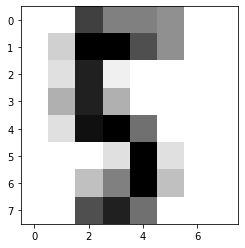

In [5]:
index = 25
print(data["target"][index])
plt.imshow(16 - data["data"][index].reshape(8,8), cmap="gray", vmin=0, vmax=16)

In [6]:
from skorch.regressor import NeuralNetRegressor
from skorch.utils import to_tensor, to_numpy
from skorch.net import NeuralNet

import torch
import torch.nn as nn

In [7]:
class Example(nn.Module):
    def __init__(self):
        super(Example, self).__init__()
        self.FINAL = nn.Sequential(
            nn.Linear(64,64),
            nn.Linear(64,64),
            nn.Linear(64,10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.FINAL(x)
        return x

In [9]:
Example().forward(to_tensor(data["data"].astype(np.single), device="cpu"))

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.3240, 0.0000,  ..., 0.0000, 0.0000, 1.0769],
        [0.0000, 0.6484, 0.0000,  ..., 0.0000, 0.0000, 0.8708],
        ...,
        [0.0000, 0.4565, 0.0000,  ..., 0.0000, 0.0000, 0.8156],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.5581]],
       grad_fn=<ReluBackward0>)

In [10]:
true_target = np.zeros((len(data["target"]), 10)).astype(np.single)
for idx, thing in enumerate(data["target"]):
    true_target[idx][thing] = 1

true_feature = to_tensor(data["data"].astype(np.single), device="cpu")
true_target = to_tensor(true_target, device="cpu")

In [12]:
simple_nn = NeuralNetRegressor(
    Example,
    max_epochs=1,
    batch_size=100,
    warm_start=True,
)

In [13]:
simple_nn.max_epochs=100
simple_nn.fit(true_feature, true_target)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1551        0.0983  0.0363
      2        0.0963        0.0945  0.0312
      3        0.0930        0.0920  0.0346
      4        0.0908        0.0896  0.0384
      5        0.0891        0.0881  0.0272
      6        0.0879        0.0866  0.0354
      7        0.0868        0.0854  0.0385
      8        0.0858        0.0845  0.0302
      9        0.0849        0.0833  0.0314
     10        0.0840        0.0825  0.0296
     11        0.0831        0.0814  0.0309
     12        0.0823        0.0803  0.0285
     13        0.0814        0.0790  0.0310
     14        0.0802        0.0777  0.0320
     15        0.0788        0.0763  0.0329
     16        0.0774        0.0751  0.0327
     17        0.0762        0.0738  0.0365
     18        0.0751        0.0731  0.0321
     19        0.0741        0.0725  0.0309
     20        0.0734        0.0721  0.0262
     21        0.0727        0.0

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Example(
    (FINAL): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=10, bias=True)
      (3): ReLU()
    )
  ),
)